## 1. Введение

In [91]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
# загружаем данные
df = pd.read_csv('web_page_data.csv')

## 2. EDA

In [6]:
df.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [10]:
df.shape

(36, 2)

#### 2.1 Полнота данных и типы данных

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Page    36 non-null     object 
 1   Time    36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [16]:
df.isnull().sum()

Page    0
Time    0
dtype: int64

#### 2.2 Уникальные значение в столбцах

In [31]:
df.Time.nunique()

34

In [79]:
df.Page.unique()

array(['Page A', 'Page B'], dtype=object)

In [77]:
sns.set_palette("Set2")
sns.set(style='ticks')

<Axes: xlabel='Page', ylabel='Count'>

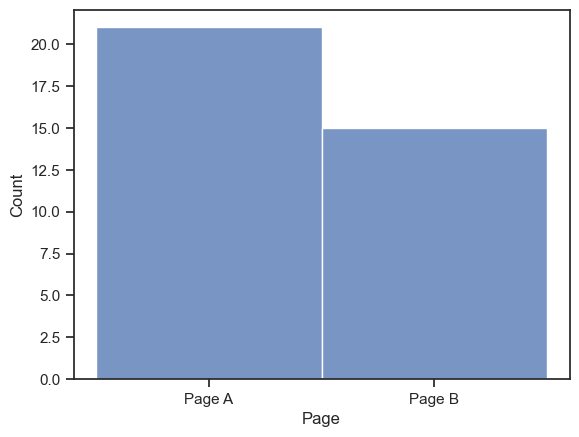

In [78]:
sns.histplot(data=df, x='Page')

#### 2.3 Дубликаты

In [17]:
df.duplicated().sum()

1

In [30]:
df[df[['Page', 'Time']].duplicated() == True]

,Page,Time
33,Page A,1.18


#### 2.4 Описательные статистики для времени в целом и для отдельных версий страниц

In [32]:
df.describe()

,Time
count,36.000000
mean,1.411944
std,0.942407
min,0.210000
25%,0.702500
50%,1.180000
75%,1.992500
max,3.570000


In [39]:
df.groupby(by='Page').describe().reset_index()

Page  Time                                                   
          count      mean       std   min   25%   50%    75%   max
0  Page A  21.0  1.263333  0.884632  0.21  0.67  0.95  1.730  3.42
1  Page B  15.0  1.620000  1.011364  0.43  0.80  1.47  2.345  3.57

#### 2.5 Визуализация

In [72]:
sns.set_palette("Set2")
sns.set(style='ticks')

<Axes: xlabel='Time', ylabel='Count'>

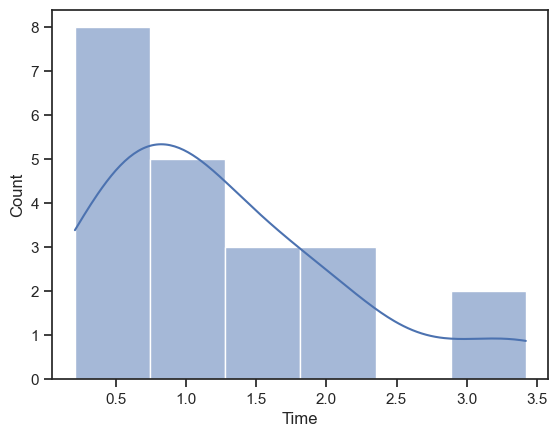

In [73]:
sns.histplot(data=df[df['Page'] == 'Page A'], x='Time', kde=True)

<Axes: xlabel='Time', ylabel='Count'>

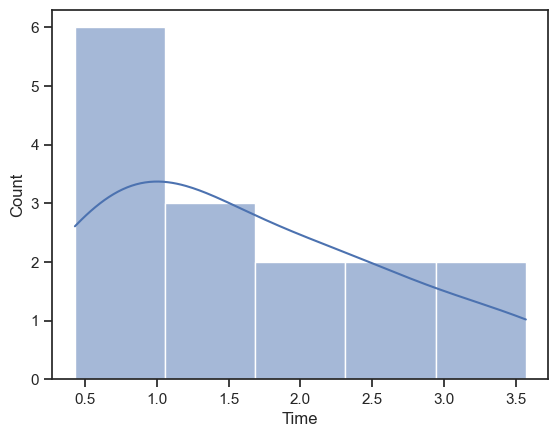

In [74]:
sns.histplot(data=df[df['Page'] == 'Page B'], x='Time', kde=True)

<Axes: xlabel='Time', ylabel='Count'>

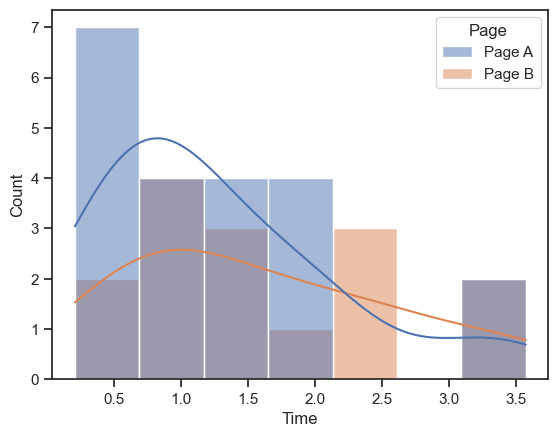

In [75]:
sns.histplot(data=df, x='Time', kde=True, hue='Page')

<Axes: xlabel='Page', ylabel='Time'>

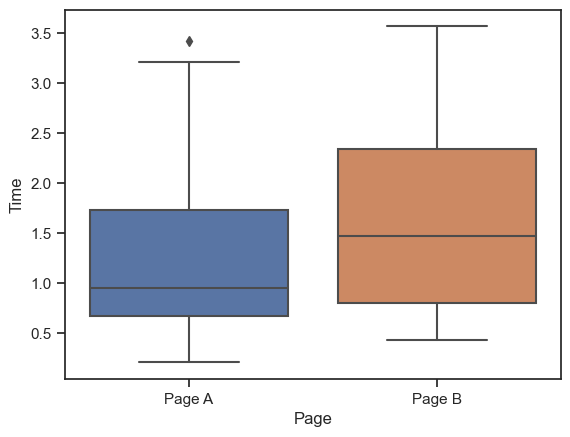

In [88]:
sns.boxplot(data=df, y='Time', x='Page')

<Axes: xlabel='Page', ylabel='Time'>

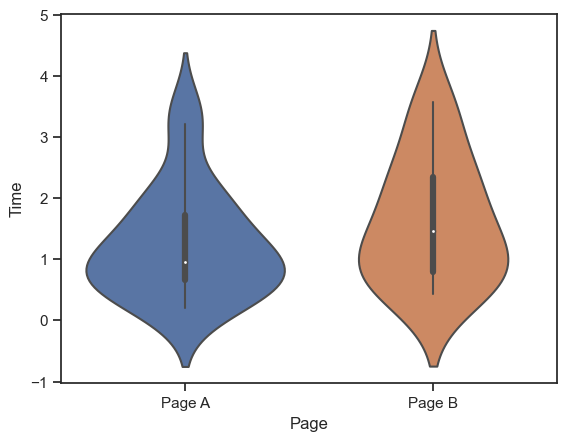

In [89]:
sns.violinplot(data=df, y='Time', x='Page')

## 3 Тестирование гипотезы

#### 3.1 Проверка выборок на номральность

#### Page A

Статистика теста: 0.884
P-значение: 0.018
Выборка 'Page A' не распределена нормально (отклоняем нулевую гипотезу)


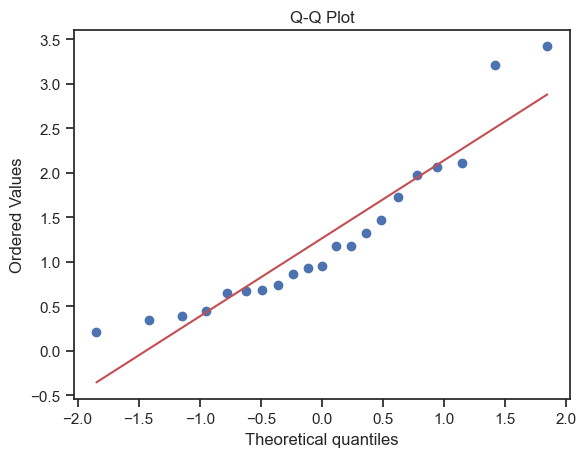

In [101]:
# Проверка нормальности с помощью теста Шапиро-Уилка
df_a = df[df['Page'] == 'Page A'] 
stat, p_value = stats.shapiro(df_a.Time)

# Вывод результата теста
print(f"Статистика теста: {stat:.3f}")
print(f"P-значение: {p_value:.3f}")

# Интерпретация результата
alpha = 0.05
if p_value > alpha:
    print("Выборка 'Page A' распределена нормально (не отклоняем нулевую гипотезу)")
else:
    print("Выборка 'Page A' не распределена нормально (отклоняем нулевую гипотезу)")

# Для визуализации можно построить Q-Q график
stats.probplot(df_a.Time, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

#### Page B

Статистика теста: 0.915
P-значение: 0.161
Выборка 'Page B' распределена нормально (не отклоняем нулевую гипотезу)


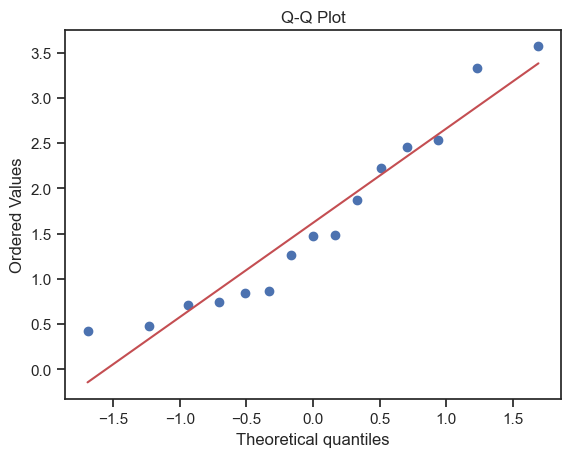

In [99]:
# Проверка нормальности с помощью теста Шапиро-Уилка
df_b = df[df['Page'] == 'Page B'] 
stat, p_value = stats.shapiro(df_b.Time)

# Вывод результата теста
print(f"Статистика теста: {stat:.3f}")
print(f"P-значение: {p_value:.3f}")

# Интерпретация результата
alpha = 0.05
if p_value > alpha:
    print("Выборка 'Page B' распределена нормально (не отклоняем нулевую гипотезу)")
else:
    print("Выборка 'Page B' не распределена нормально (отклоняем нулевую гипотезу)")

# Для визуализации можно построить Q-Q график
stats.probplot(df_b.Time, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

#### Непараметрический тест Манна-Уитни

In [105]:
stat, p_value = stats.mannwhitneyu(df_a.Time, df_b.Time)

# Вывод результата теста
print(f"Статистика теста: {stat:.3f}")
print(f"P-значение: {p_value:.3f}")

# Интерпретация результата
alpha = 0.05
if p_value > alpha:
    print("Нет достаточных оснований отвергать нулевую гипотезу. Не отвергаем Н0: разница между средними значениями времени проведенного на страницах 'А' и 'В' незначительна")
else:
    print("Достаточно оснований отвергнуть нулевую гипотезу, верна Н1: наличие существенной разницы между средними значениями времени проведенного на страницах 'А' и 'В'")

Статистика теста: 119.500
P-значение: 0.229
Нет достаточных оснований отвергать нулевую гипотезу. Не отвергаем Н0: разница между средними значениями времени проведенного на страницах 'А' и 'В' незначительна


## 4 Заключение